In [155]:
from PIL import Image, ImageOps
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors

In [156]:
directory = 'pca_dataset'
target_directory = 'pca_dataset_transformed'
images = []
class_labels = []
size = 75, 100

def get_images():
    for subdirs, dirs, files in os.walk(directory):
        for file in files:

            name_tokenized = file.split('_')
            class_labels.append(name_tokenized[0])

            img = Image.open(directory + os.sep + file).convert('L')    #grayscale
            img = img.rotate(int(name_tokenized[1]), expand=True)  #rotate
            img.thumbnail(size)                        #resize
            # img.save(target_directory + os.sep + file, "PNG")
            # plt.imshow(img, cmap='gray')
            # plt.show()
            images.append(np.ravel(img))

In [157]:
def get_image_from_array(image):
    return image.reshape((size[1], size[0]))

In [158]:
get_images()

In [159]:
len(class_labels)

44

In [160]:
def plot_multiple(images, labels = None, need_rounding = False, name='fig'):
    fig=plt.figure(figsize=(7, 16))
    columns = 4
    rows = 11
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(get_image_from_array(images[i-1]), cmap='gray')
        if labels is not None and i-1 < len(labels):
            plt.title(round(labels[i-1], 3) if need_rounding else labels[i-1], fontsize=9)
        plt.axis('off')
    plt.savefig(name, bbox_inches='tight')
    plt.show()

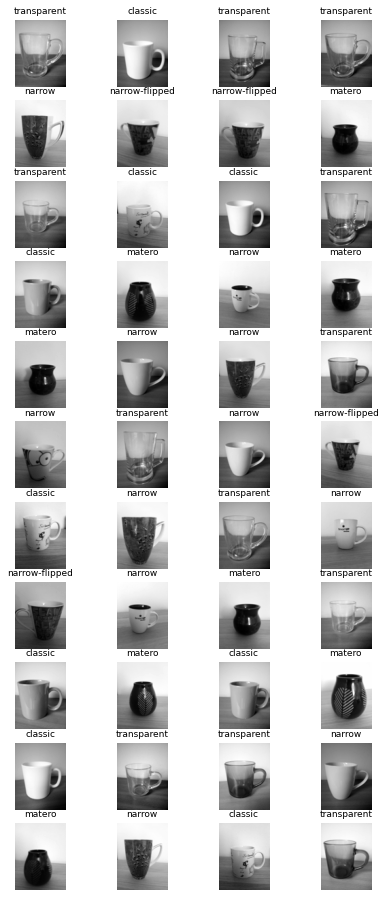

In [161]:
plot_multiple(images, class_labels, name='dataset')

In [162]:
print(images)
images = np.array(images)

[array([156, 157, 159, ...,  63,  61,  60], dtype=uint8), array([120, 122, 125, ...,  52,  49,  49], dtype=uint8), array([144, 146, 148, ...,  63,  59,  58], dtype=uint8), array([157, 158, 160, ...,  87,  85,  81], dtype=uint8), array([217, 217, 218, ..., 123, 125, 130], dtype=uint8), array([238, 238, 238, ..., 126, 129, 131], dtype=uint8), array([211, 211, 212, ..., 114, 115, 116], dtype=uint8), array([178, 178, 179, ...,  91,  92,  93], dtype=uint8), array([161, 163, 165, ...,  55,  55,  52], dtype=uint8), array([179, 179, 180, ...,  82,  82,  84], dtype=uint8), array([123, 124, 127, ...,  37,  34,  33], dtype=uint8), array([144, 146, 148, ...,  79,  76,  74], dtype=uint8), array([173, 175, 177, ...,  51,  49,  47], dtype=uint8), array([222, 222, 223, ..., 129, 128, 125], dtype=uint8), array([235, 235, 236, ..., 118, 117, 117], dtype=uint8), array([233, 233, 234, ..., 150, 150, 151], dtype=uint8), array([183, 183, 183, ..., 107, 107, 106], dtype=uint8), array([102, 104, 107, ...,  35

In [163]:
pca = PCA()
pca.fit(images)

PCA()

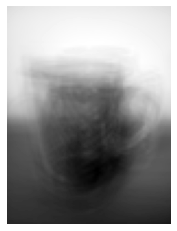

In [164]:
mean = np.mean(images, axis=0)
plt.imshow(get_image_from_array(mean), cmap='gray')
plt.axis('off')
plt.savefig('mean', bbox_inches='tight')
plt.show()

In [165]:
# for i in range(len(pca.components_)):
#     plt.imshow(get_image_from_array(pca.components_[i]), cmap='gray')
#     plt.title(round(pca.explained_variance_ratio_[i], 3))
#     plt.show()

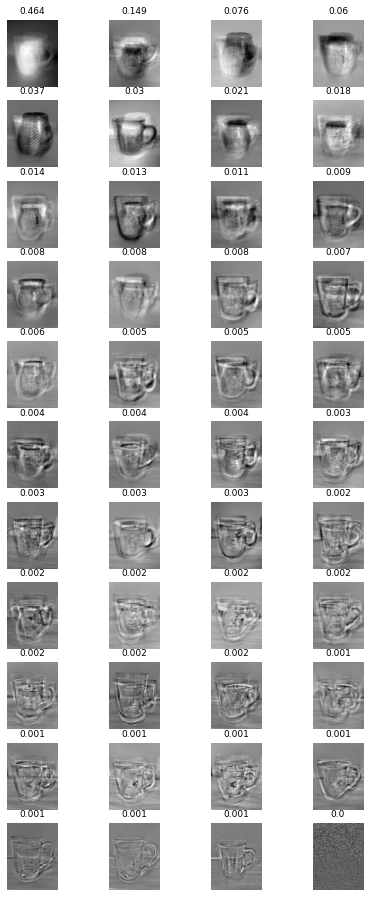

In [166]:
plot_multiple(pca.components_, pca.explained_variance_ratio_, need_rounding=True, name='principal_components')

4 traits

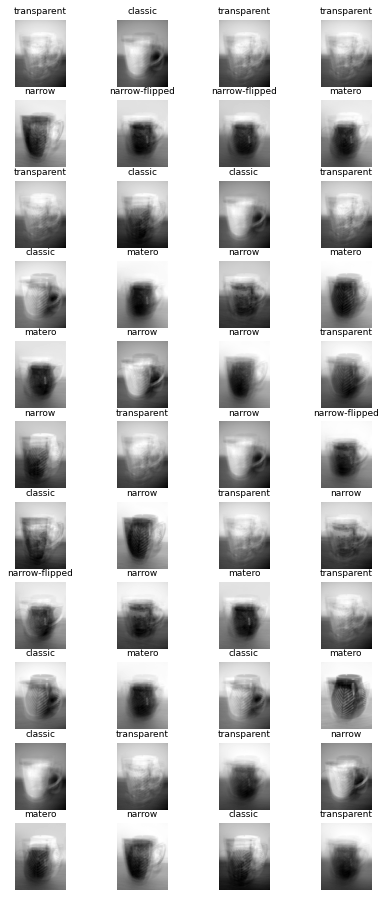

In [167]:
pca = PCA(n_components=4)
pca.fit(images)
transformed_images = pca.transform(images)
inv_transformed_images = pca.inverse_transform(transformed_images)
plot_multiple(inv_transformed_images, class_labels, name='4_components')

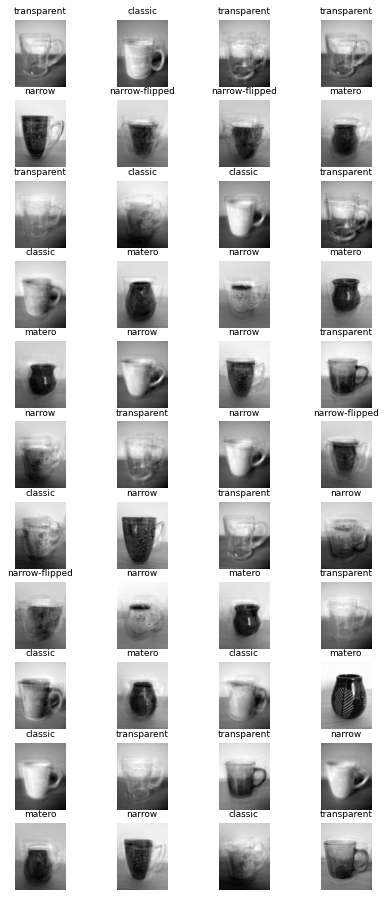

In [168]:
pca = PCA(n_components=16)
pca.fit(images)
transformed_images = pca.transform(images)
inv_transformed_images = pca.inverse_transform(transformed_images)
plot_multiple(inv_transformed_images, class_labels, name='16_components')

In [169]:
distinct_labels = list(set(class_labels))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'][:len(distinct_labels)]
label_colors = [colors[distinct_labels.index(label)] for label in class_labels]

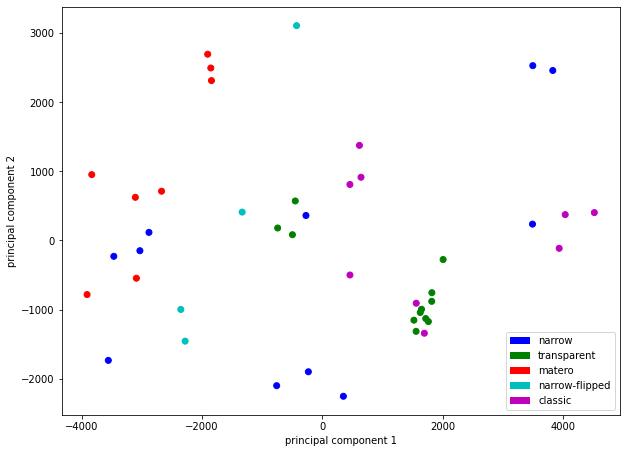

In [172]:
pca = PCA(n_components=2)
pca.fit(images)
transformed_images = pca.transform(images)
fig=plt.figure(figsize=(10, 7.5))
plt.scatter(transformed_images[:,0], transformed_images[:, 1], c=label_colors)
recs = []
for i in range(len(distinct_labels)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs, distinct_labels, loc='lower right')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.savefig('2d')